<a href="https://colab.research.google.com/github/sravya15280203/wheatflour-iron-detector/blob/main/iron_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!pip install pillow scikit-learn pandas matplotlib


In [ ]:
#libraries
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
# Paths from Drive
csv_path = "/content/drive/My Drive/iron_flour_dataset.csv"
image_dir = "/content/drive/My Drive/wheat_flour_images"



In [ ]:

df = pd.read_csv(csv_path)

# First 100 known, last 10 unknown
known = df.iloc[:100]
unknown = df.iloc[100:]

# Feature extractor
def extract_features(image_path):
    img = Image.open(image_path).convert('L').resize((64, 64))
    return np.array(img).flatten() / 255.0



In [ ]:
X = np.array([extract_features(os.path.join(image_dir, img)) for img in known["image_name"]])
y = known["iron_ppm"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Train linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Test model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")



Test MSE: 20.37
y_test shape: (20,)
y_pred shape: (20,)
R² Score: 0.72


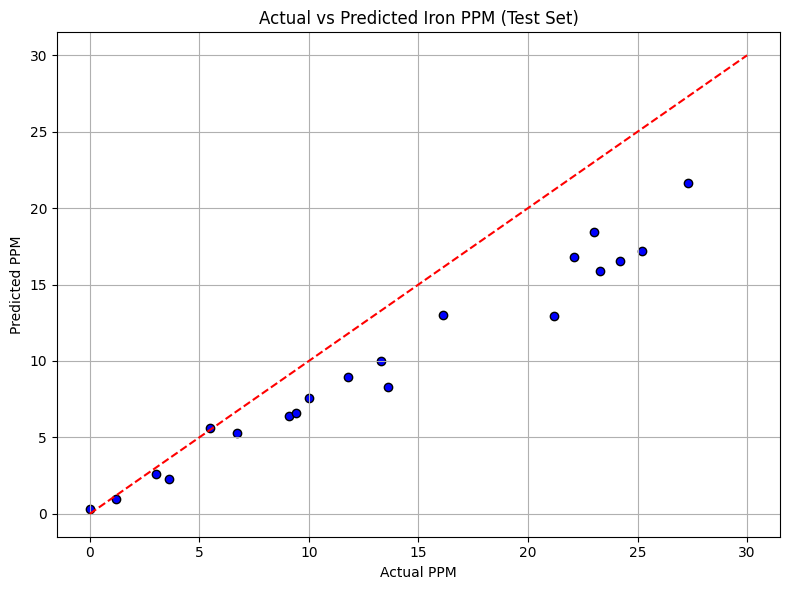

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([0, 30], [0, 30], color='red', linestyle='--')
plt.xlabel("Actual PPM")
plt.ylabel("Predicted PPM")
plt.title("Actual vs Predicted Iron PPM (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#  Predict on unknown images
X_unknown = np.array([extract_features(os.path.join(image_dir, name)) for name in unknown["image_name"]])
unknown_preds = model.predict(X_unknown)

print("\nPredicted Iron PPM for Unknown Images:")
for name, pred in zip(unknown["image_name"], unknown_preds):
    print(f"{name}: {pred:.2f}")



Predicted Iron PPM for Unknown Images:
flour_101.png: 14.95
flour_102.png: 0.30
flour_103.png: 0.53
flour_104.png: 2.67
flour_105.png: 9.05
flour_106.png: 2.87
flour_107.png: 4.84
flour_108.png: 17.24
flour_109.png: 19.11
flour_110.png: 15.20
